<a href="https://colab.research.google.com/github/SAFEERHYDER/Classfication-of-Chest-Xray/blob/main/COVID19_CLASSIFIER_DATAGENERATOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

| Number of CONV2D Layers | Number of Epochs| Training Batch_Size |Target Size  | Optimizer | Learning Rate | Test Acc| Train Acc | Val Acc | 
| --- | --- | --- | --- | --- | --- | --- | --- | --- | 
| 5 | 15 | 128 |300 | 'RmsProp' | 0.001 | 87 | 94 | 81 |
| 5 | 15 | 128 |150 | 'RmsProp' | 0.001 | |  |  |

In [ ]:
pwd

'C:\\Users\\Dr. Gulsher'

In [ ]:

import os
import zipfile
# Test

local_zip = 'C:/Users/Dr. Gulsher/train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')

In [ ]:
zip_ref.extractall('C:/Users/Dr. Gulsher/train')


In [ ]:
local_zip = 'C:/Users/Dr. Gulsher/val.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('C:/Users/Dr. Gulsher/val')

In [ ]:
local_zip = 'C:/Users/Dr. Gulsher/test.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('C:/Users/Dr. Gulsher/test')

In [ ]:
#zip_ref.extractall('chest_xray/val')
zip_ref.close()

In [ ]:
# Directory with our training horse pictures
train_NORMAL_dir = os.path.join('C:/Users/Dr. Gulsher/train/train/NORMAL')

# Directory with our training human pictures
train_PNEUMONIA_dir = os.path.join('C:/Users/Dr. Gulsher/train/train/PNEUMONIA')

# Directory with our training horse pictures
validation_NORMAL_dir = os.path.join('C:/Users/Dr. Gulsher/val/val/NORMAL')

# Directory with our training human pictures
validation_PNEUMONIA_dir = os.path.join('C:/Users/Dr. Gulsher/val/val/PNEUMONIA')

In [ ]:
train_NORMAL_names = os.listdir(train_NORMAL_dir)
#print(train_NORMAL_names[:10])

train_PNEUMONIA_names = os.listdir(train_PNEUMONIA_dir)
#print(train_PNEUMONIA_names[:10])

validation_horse_hames = os.listdir(validation_NORMAL_dir)
validation_human_names = os.listdir(validation_PNEUMONIA_dir)

In [ ]:
print('total training NORMAL images:', len(os.listdir(train_NORMAL_dir)))
print('total training PNEUMONIA images:', len(os.listdir(train_PNEUMONIA_dir)))


total training NORMAL images: 1341
total training PNEUMONIA images: 3875


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

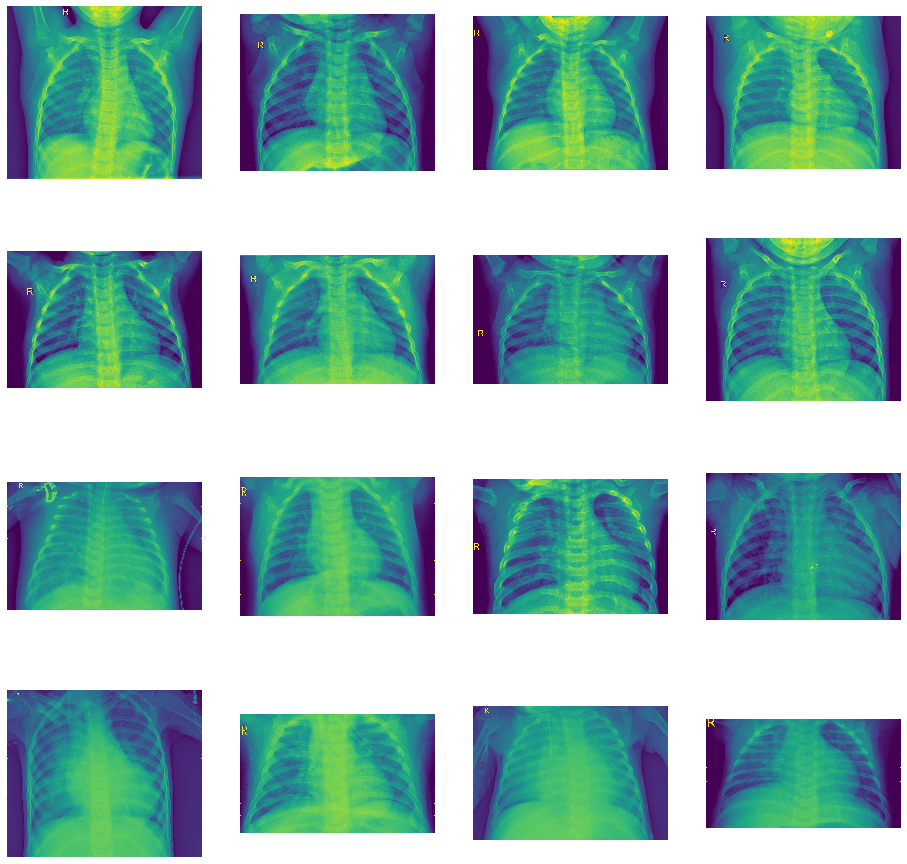

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_NORMAL_pix = [os.path.join(train_NORMAL_dir, fname) 
                for fname in train_NORMAL_names[pic_index-8:pic_index]]
next_PNEUMONIA_pix = [os.path.join(train_PNEUMONIA_dir, fname) 
                for fname in train_PNEUMONIA_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_NORMAL_pix+next_PNEUMONIA_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 64)       

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)
# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'C:/Users/Dr. Gulsher/train/train',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')
# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        'C:/Users/Dr. Gulsher/val/val',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=8,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=41,  
      epochs=15,
      validation_data = validation_generator,
      validation_steps=2,
      verbose=2,
    )

Epoch 1/15
41/41 - 112s - loss: 0.6043 - acc: 0.7042 - val_loss: 0.7104 - val_acc: 0.5000
Epoch 2/15
41/41 - 89s - loss: 0.4956 - acc: 0.7768 - val_loss: 0.6589 - val_acc: 0.6875
Epoch 3/15
41/41 - 90s - loss: 0.3412 - acc: 0.8566 - val_loss: 0.6223 - val_acc: 0.7500
Epoch 4/15
41/41 - 90s - loss: 0.2294 - acc: 0.9062 - val_loss: 1.2330 - val_acc: 0.6250
Epoch 5/15
41/41 - 89s - loss: 0.1931 - acc: 0.9199 - val_loss: 1.1054 - val_acc: 0.5625
Epoch 6/15
41/41 - 88s - loss: 0.1492 - acc: 0.9433 - val_loss: 0.8250 - val_acc: 0.6875
Epoch 7/15
41/41 - 87s - loss: 0.1280 - acc: 0.9482 - val_loss: 0.5705 - val_acc: 0.7500
Epoch 8/15
41/41 - 86s - loss: 0.1034 - acc: 0.9599 - val_loss: 0.2175 - val_acc: 0.8750
Epoch 9/15
41/41 - 84s - loss: 0.0984 - acc: 0.9618 - val_loss: 0.5107 - val_acc: 0.7500
Epoch 10/15
41/41 - 84s - loss: 0.0792 - acc: 0.9691 - val_loss: 0.1970 - val_acc: 0.9375
Epoch 11/15
41/41 - 85s - loss: 0.0728 - acc: 0.9720 - val_loss: 0.0533 - val_acc: 1.0000
Epoch 12/15
41/41 

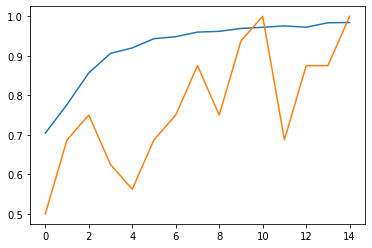

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

In [ ]:
import numpy as np

#from google.colab import files
from tensorflow.keras.preprocessing import image

#uploaded = files.upload()

#for fn in uploaded.keys():
 
  # predicting images
path = 'IM-0023-0001.jpeg' 
img = image.load_img(path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes[0])
if classes[0]>0.5:
    print("Patient has Pnemunia")
else:
    print("Patient is Normal")
 

[0.]
Patient is Normal


In [ ]:
classes

array([[0.]], dtype=float32)

In [ ]:

test_datagen = ImageDataGenerator(rescale=1/255)
test_generator = test_datagen.flow_from_directory(
        'C:/Users/Dr. Gulsher/test/test',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=1,
        color_mode="rgb",
        shuffle = False,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')



Found 624 images belonging to 2 classes.


In [ ]:
filenames = test_generator.filenames
nb_samples = len(filenames)

predict = model.predict_generator(test_generator, steps = nb_samples)

In [ ]:
model.evaluate(test_generator)

624/624 [==============================] - 8s 13ms/step - loss: 0.5967 - acc: 0.8558


[0.5966733553447586, 0.8557692]

C:\Users\Dr. Gulsher\anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


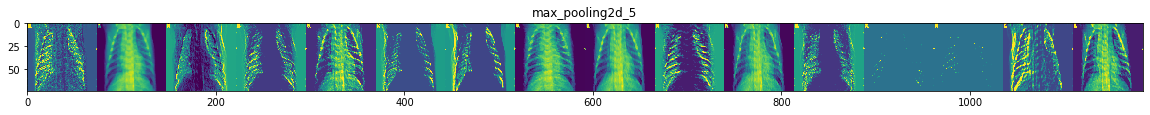

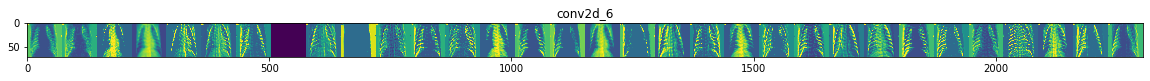

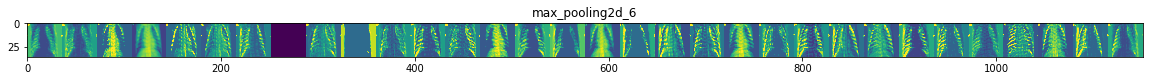

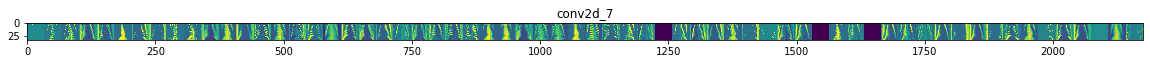

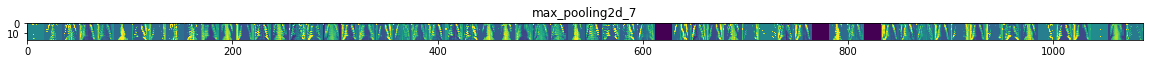

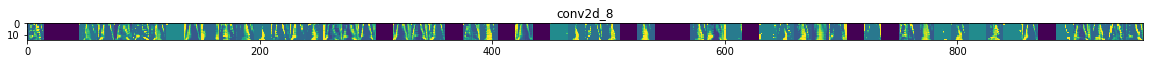

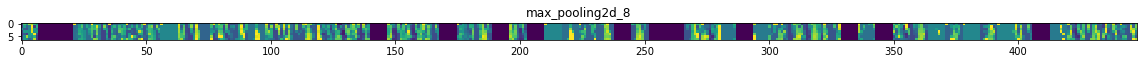

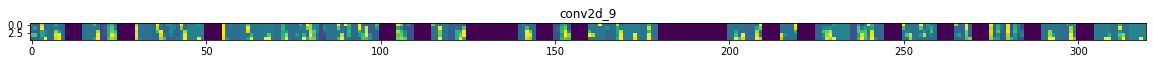

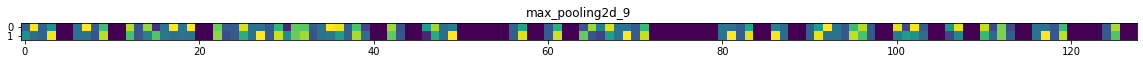

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
NORMAL_img_files = [os.path.join(train_NORMAL_dir, f) for f in train_NORMAL_names]
PNEUMONIA_img_files = [os.path.join(train_PNEUMONIA_dir, f) for f in train_PNEUMONIA_names]
img_path = random.choice(NORMAL_img_files + PNEUMONIA_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

Text(0.5, 1.0, 'Training and validation loss')

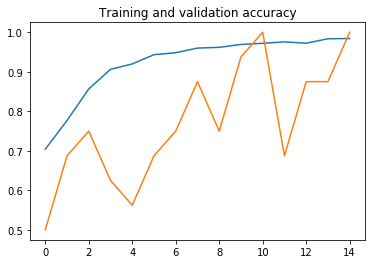

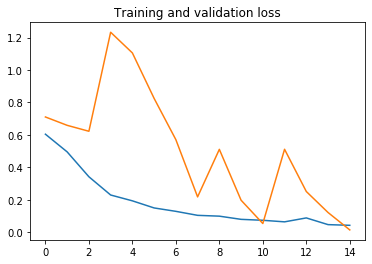

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )